In [1]:
#Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
from matplotlib.pyplot import figure

In [2]:
#importing database of stock data
googl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/GOOGL/GOOGL.csv',parse_dates=['Date'],index_col='Date')

In [3]:
#checking data
googl_data.info(),googl_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4020 entries, 2004-08-19 to 2020-08-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4020 non-null   float64
 1   High       4020 non-null   float64
 2   Low        4020 non-null   float64
 3   Close      4020 non-null   float64
 4   Adj Close  4020 non-null   float64
 5   Volume     4020 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 219.8 KB


(None,
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64)

In [4]:
#renaming
df = googl_data

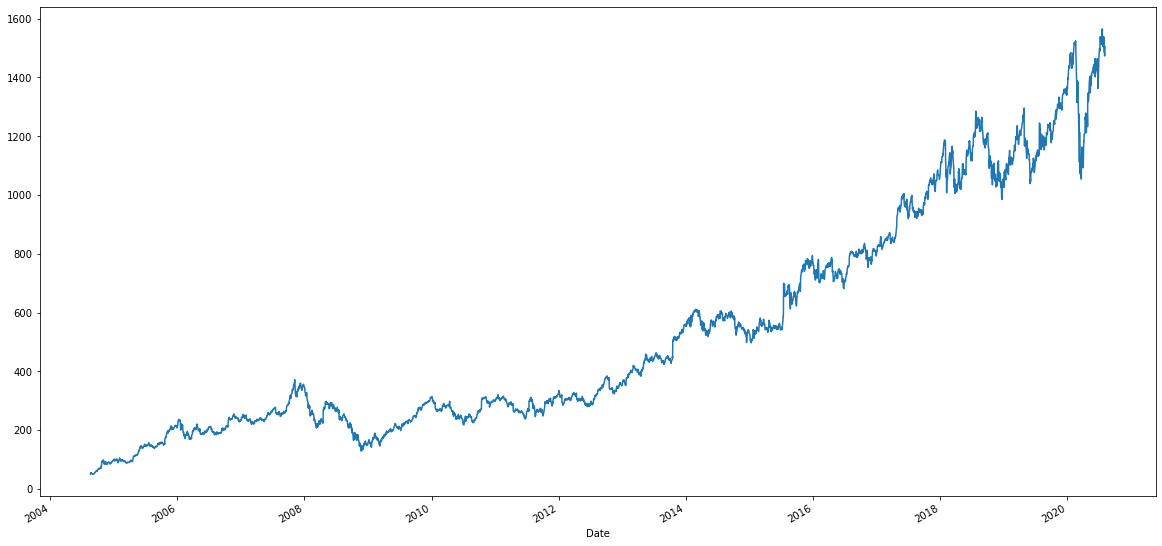

In [5]:
#Plot of data 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df['Adj Close'].plot(ax=ax)

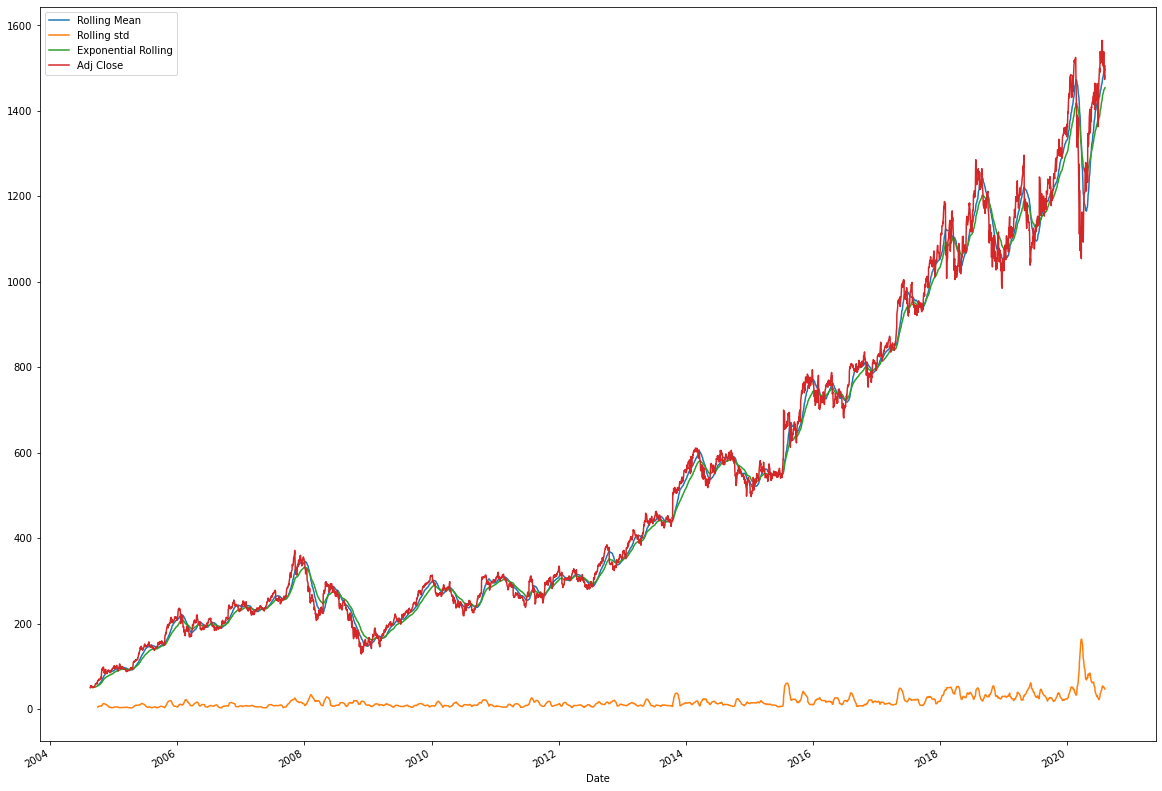

In [6]:
#Rolling data,std,mean and exponential rolling mean of data over a 30day period 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
df['Adj Close'].rolling(30).mean().plot(ax=ax,label='Rolling Mean')
df['Adj Close'].rolling(30).std().plot(ax=ax,label='Rolling std')
df['Adj Close'].ewm(30,adjust=False).mean().plot(ax=ax,label='Exponential Rolling')
df['Adj Close'].plot(ax=ax,label='Adj Close')
plt.legend()

In [7]:
#Creating functions of indicators to add to data frame to check which ones are best for predicting future stock price

In [8]:
from ta.momentum import RSIIndicator,AwesomeOscillatorIndicator,KAMAIndicator,PercentagePriceOscillator,PercentageVolumeOscillator
from ta.momentum import ROCIndicator,StochRSIIndicator,StochasticOscillator,TSIIndicator,UltimateOscillator
from ta.momentum import WilliamsRIndicator

In [9]:
rsi_indicator = RSIIndicator(close=df['Adj Close'])
awesome_oscillator_indicator = AwesomeOscillatorIndicator(high=df['High'],low=df['Low'])
kama_indicator = KAMAIndicator(close=df['Adj Close'])
percentage_price_oscillator_indicator = PercentagePriceOscillator(close=df['Adj Close'])
percentage_volume_oscillator_indicator = PercentageVolumeOscillator(volume=df['Volume'])
roc_indicator = ROCIndicator(close=df['Adj Close'])
stoch_rsi_indicator = StochRSIIndicator(close=df['Adj Close'])
stoch_rsi_oscillator_indicator = StochasticOscillator(high=df['High'],low=df['Low'],close=df['Adj Close'])
tsi_indicator = TSIIndicator(close=df['Adj Close'])
ultimate_oscillator_indicator = UltimateOscillator(high=df['High'],low=df['Low'],close=df['Adj Close'])
williams_r_indicator = WilliamsRIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])

In [10]:
df['RSI'] = rsi_indicator.rsi()
df['Awesome Oscillator'] = awesome_oscillator_indicator.awesome_oscillator()
df['KAMA'] = kama_indicator.kama()
df['PPO'] = percentage_price_oscillator_indicator.ppo()
df['PVO'] = percentage_volume_oscillator_indicator.pvo()
df['ROC'] = roc_indicator.roc()
df['Stoch RSI In'] = stoch_rsi_indicator.stochrsi()
df['Stoch RSI OS'] = stoch_rsi_oscillator_indicator.stoch()
df['TSI'] = tsi_indicator.tsi()
df['Ult Osc'] = ultimate_oscillator_indicator.ultimate_oscillator()
df['Williams R'] = williams_r_indicator.williams_r() 

In [11]:
from ta.trend import MACD, ADXIndicator, AroonIndicator,CCIIndicator,DPOIndicator
from ta.trend import EMAIndicator,IchimokuIndicator,KSTIndicator,MassIndex,PSARIndicator
from ta.trend import STCIndicator,TRIXIndicator,VortexIndicator,WMAIndicator

In [12]:
macd_indicator = MACD(df['Adj Close'])
adx_indicator = ADXIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
aroon_indicator = AroonIndicator(close=df['Adj Close'])
cci_indicator = CCIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
dpo_indicator = DPOIndicator(close=df['Adj Close'])
ema_indicator = EMAIndicator(close=df['Adj Close'])
ichimoku_indicator = IchimokuIndicator(high=df['High'],low=df['Low'])
kst_indicator = KSTIndicator(close=df['Adj Close'])
mass_indicator = MassIndex(high=df['High'],low=df['Low'])
psar_indicator = PSARIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
stc_indicator = STCIndicator(close=df['Adj Close'])
trix_indicator = TRIXIndicator(close=df['Adj Close'])
vortex_indicator = VortexIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
wma_indicator = WMAIndicator(close=df['Adj Close'])

In [13]:
df['MACD'] = macd_indicator.macd()
df['ADX'] = adx_indicator.adx()
df['Aroon'] = aroon_indicator.aroon_indicator()
df['CCI'] = cci_indicator.cci()
df['DPO'] = dpo_indicator.dpo()
df['EMA'] = ema_indicator.ema_indicator()
df['Ichimoku Base'] = ichimoku_indicator.ichimoku_base_line() 
df['Ichimoku CL'] = ichimoku_indicator.ichimoku_conversion_line()
df['KST'] = kst_indicator.kst()
df['MASS'] = mass_indicator.mass_index() 
df['PSAR'] = psar_indicator.psar()
df['STC'] = stc_indicator.stc()
df['TRIX'] = trix_indicator.trix() 
df['VI'] = vortex_indicator.vortex_indicator_diff()
df['WMA'] = wma_indicator.wma()

C:\Users\Jonat\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Jonat\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [14]:
from ta.volatility import BollingerBands,AverageTrueRange,DonchianChannel,KeltnerChannel,UlcerIndex

In [15]:
bollinger_band_indicator = BollingerBands(close=df['Adj Close'])
average_true_range_indicator = AverageTrueRange(high=df['High'],low=df['Low'],close=df['Adj Close'])
donchain_channel_indicator = DonchianChannel(high=df['High'],low=df['Low'],close=df['Adj Close'])
keltner_channel_indicator = KeltnerChannel(high=df['High'],low=df['Low'],close=df['Adj Close'])
ulcer_indicator = UlcerIndex(close=df['Adj Close'])

In [16]:
df['Bollinger Avg'] = bollinger_band_indicator.bollinger_mavg()
df['Bollinger High'] = bollinger_band_indicator.bollinger_hband()
df['Bollinger Low'] = bollinger_band_indicator.bollinger_lband()
df['ATR'] = average_true_range_indicator.average_true_range()
df['Donchain Mid'] = donchain_channel_indicator.donchian_channel_mband()
df['Donchain High'] = donchain_channel_indicator.donchian_channel_hband()
df['Donchain Low'] = donchain_channel_indicator.donchian_channel_lband()
df['Keltner Mid'] = keltner_channel_indicator.keltner_channel_mband()
df['Keltner High'] = keltner_channel_indicator.keltner_channel_hband()
df['Keltner Low'] = keltner_channel_indicator.keltner_channel_lband()
df['Ulcer'] = ulcer_indicator.ulcer_index()

In [17]:
from ta.volume import OnBalanceVolumeIndicator,AccDistIndexIndicator,ChaikinMoneyFlowIndicator,EaseOfMovementIndicator,ForceIndexIndicator
from ta.volume import MFIIndicator,NegativeVolumeIndexIndicator,VolumePriceTrendIndicator,VolumeWeightedAveragePrice

In [18]:
on_balance_volume_indicator = OnBalanceVolumeIndicator(close=df['Adj Close'],volume=df['Volume'])
acc_dist_indicator_indicator = AccDistIndexIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
chaikin_money_flow_indicator = ChaikinMoneyFlowIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
ease_movement_indicator = EaseOfMovementIndicator(high=df['High'],low=df['Low'],volume=df['Volume'])
rorce_index_indicator = ForceIndexIndicator(close=df['Adj Close'],volume=df['Volume'])
mfi_indicator = MFIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
nvi_indicator = NegativeVolumeIndexIndicator(close=df['Adj Close'],volume=df['Volume'])
vpt_indicator = VolumePriceTrendIndicator(close=df['Adj Close'],volume=df['Volume'])
vwap_indicator = VolumeWeightedAveragePrice(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])

In [19]:
df['OBV'] = on_balance_volume_indicator.on_balance_volume() 
df['ADI'] = acc_dist_indicator_indicator.acc_dist_index()
df['CMF'] = chaikin_money_flow_indicator.chaikin_money_flow()
df['EoM'] = ease_movement_indicator.ease_of_movement()
df['FI'] = rorce_index_indicator.force_index()
df['MFI'] = mfi_indicator.money_flow_index()
df['NVI'] = nvi_indicator.negative_volume_index()
df['VPT'] = vpt_indicator.volume_price_trend()
df['VWAP'] = vwap_indicator.volume_weighted_average_price()

In [20]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,Awesome Oscillator,KAMA,PPO,...,Ulcer,OBV,ADI,CMF,EoM,FI,MFI,NVI,VPT,VWAP
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-31,1497.050049,1505.020020,1454.000000,1487.949951,1487.949951,4576400,48.055098,28.689746,1508.099006,1.134375,...,2.466893,1402381900,4.748857e+08,0.189187,-42944.064446,-3.088700e+07,43.505610,3633.477365,-132414.121943,1516.624265
2020-08-03,1491.000000,1497.729980,1471.719971,1482.760010,1482.760010,2274100,47.182079,18.333239,1505.877415,0.866918,...,2.819906,1400107800,4.745421e+08,0.156474,5964.614555,-2.816064e+07,51.992415,3620.803866,-157923.430412,1514.136239
2020-08-04,1486.709961,1493.109985,1464.030029,1473.300049,1473.300049,1860600,45.557447,10.350414,1502.969122,0.597139,...,3.201402,1398247200,4.738678e+08,0.196918,-9619.811521,-2.665215e+07,45.189601,3597.703254,-19802.585290,1511.166546
2020-08-05,1476.819946,1490.000000,1471.219971,1479.089966,1479.089966,1457500,46.765644,1.898856,1500.654457,0.409319,...,3.495613,1399704700,4.736318e+08,0.182293,2628.532102,-2.163915e+07,50.706610,3611.841856,-6142.743500,1509.611048
2020-08-06,1476.150024,1506.270020,1471.900024,1504.949951,1504.949951,1664400,51.899988,-5.345441,1500.699601,0.394815,...,3.621852,1401369100,4.751684e+08,0.205719,17501.019623,-1.239908e+07,50.569874,3611.841856,34827.716957,1508.377090


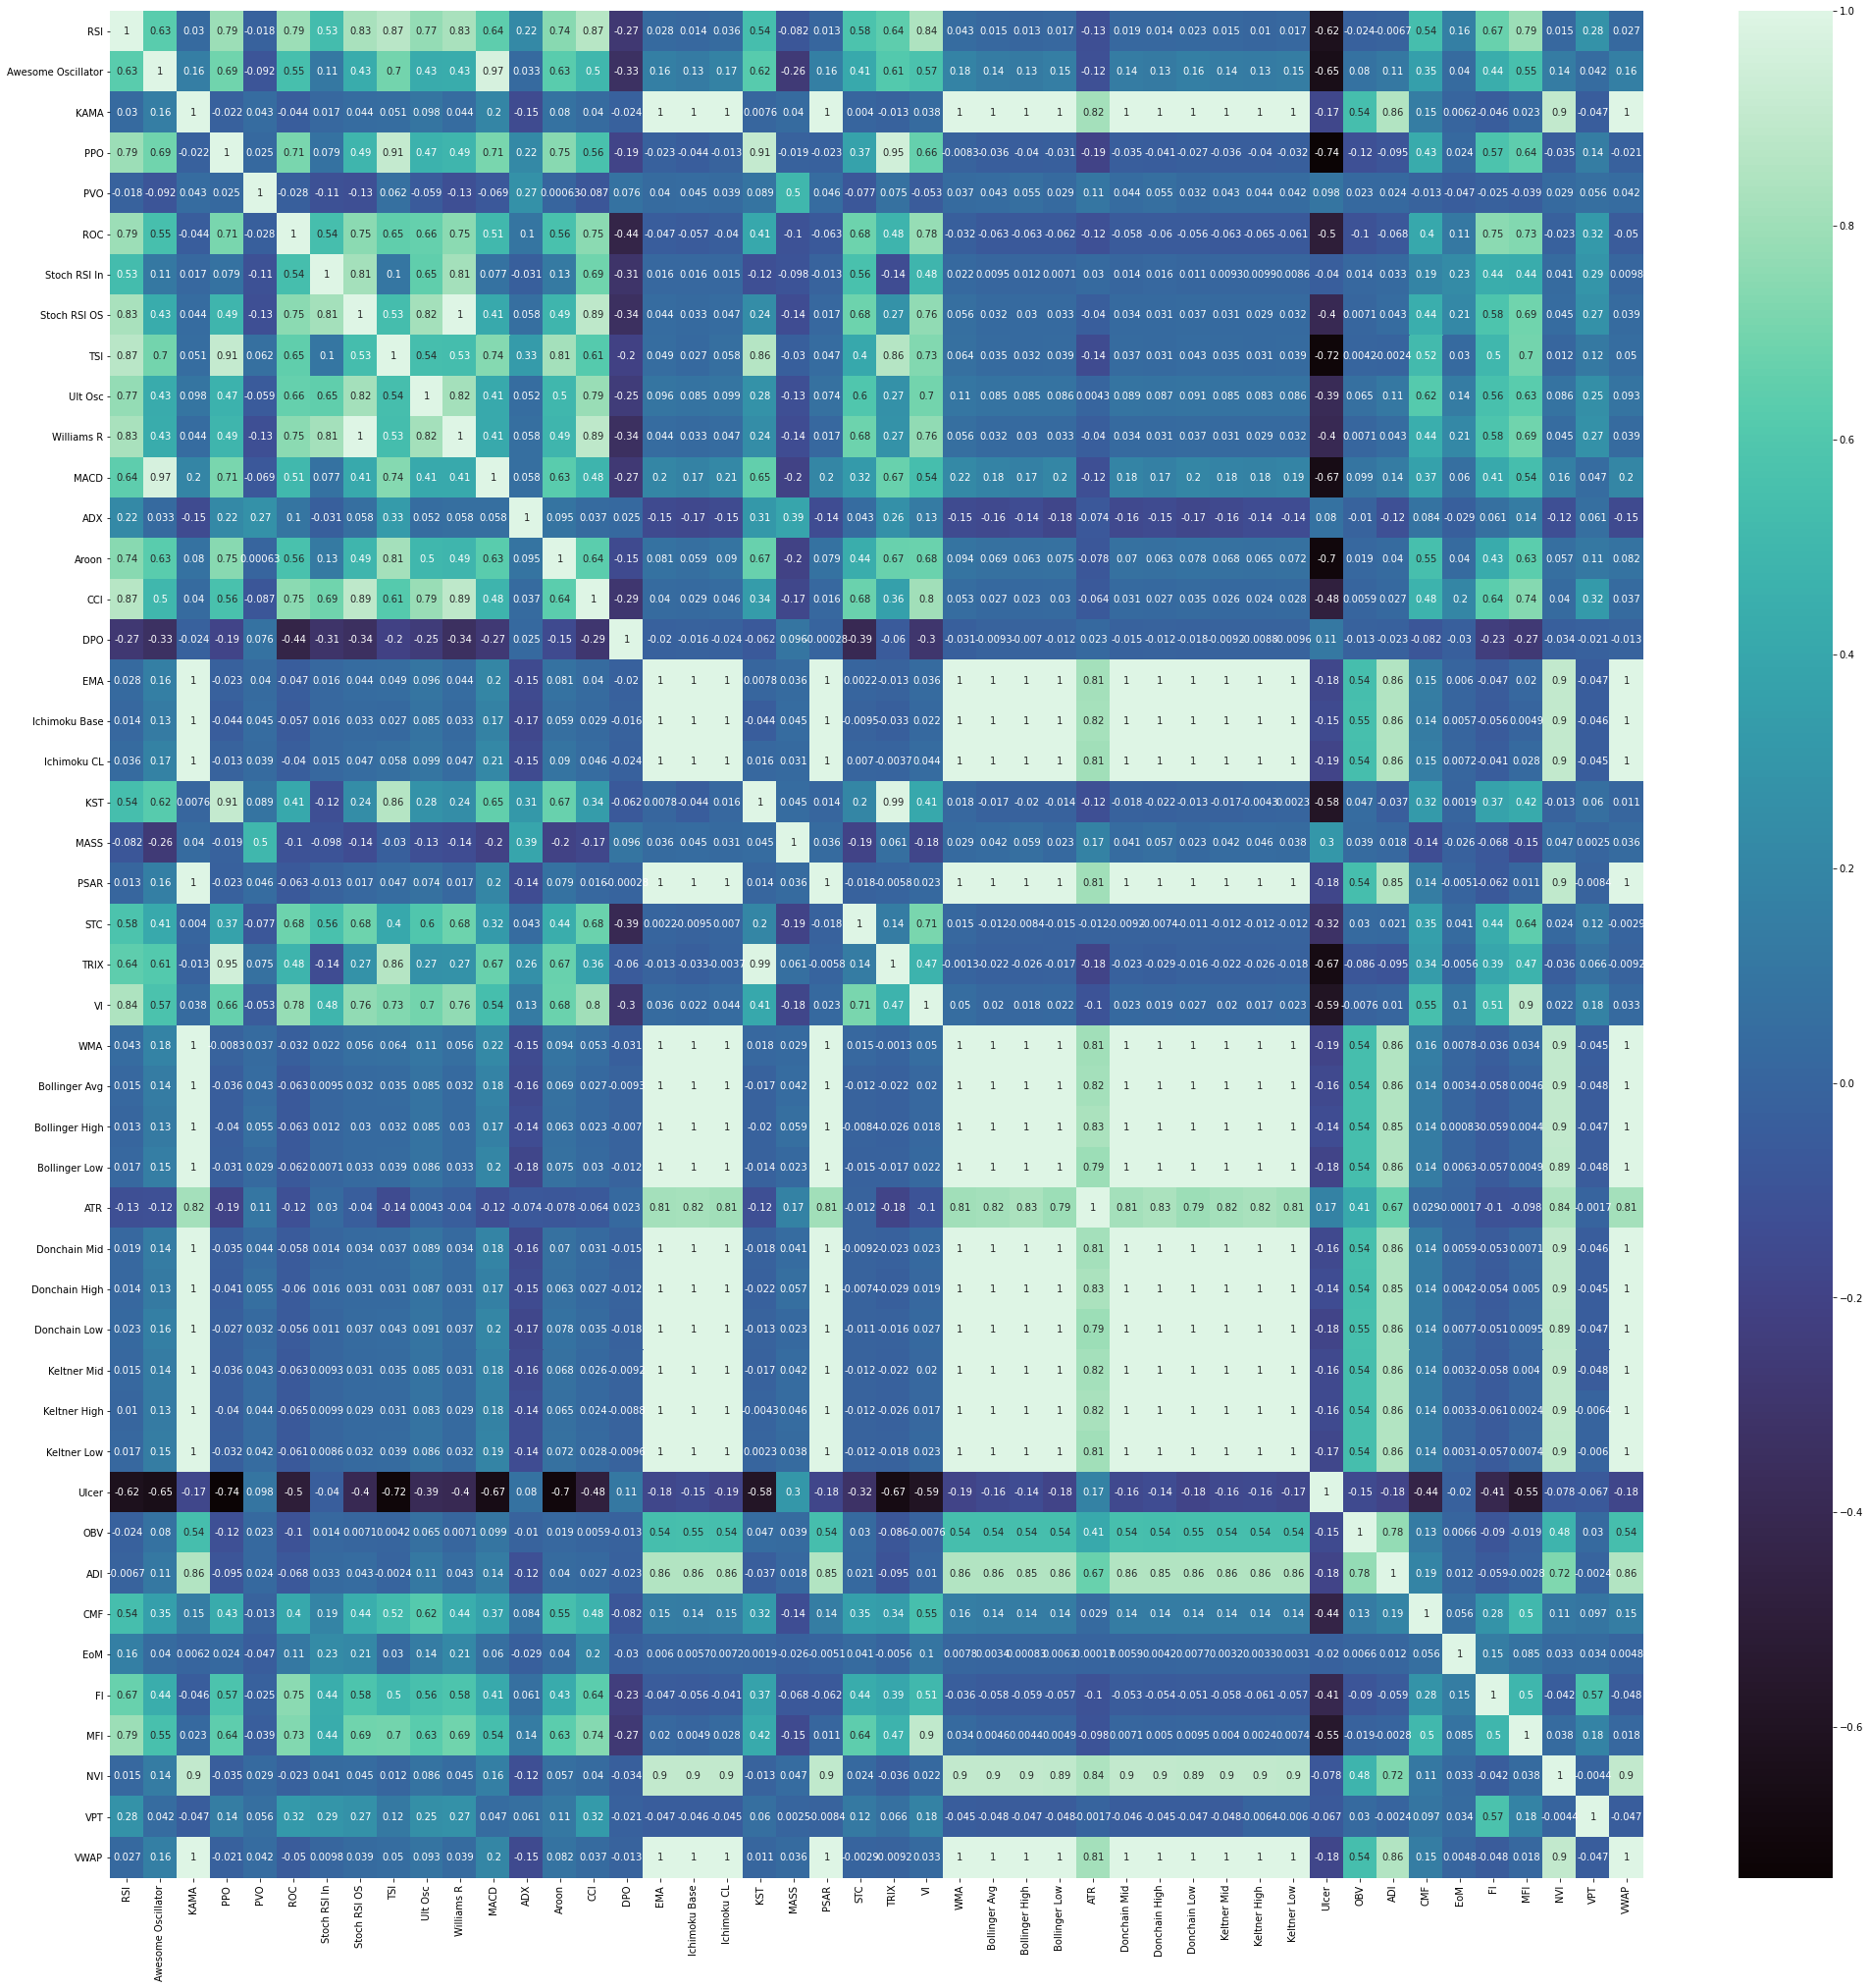

In [21]:

fig, ax = plt.subplots(figsize=(35,35))
sns.heatmap(df.drop(columns=['Open','Close','High','Low','Adj Close','Volume']).corr(),annot=True,cmap='mako')

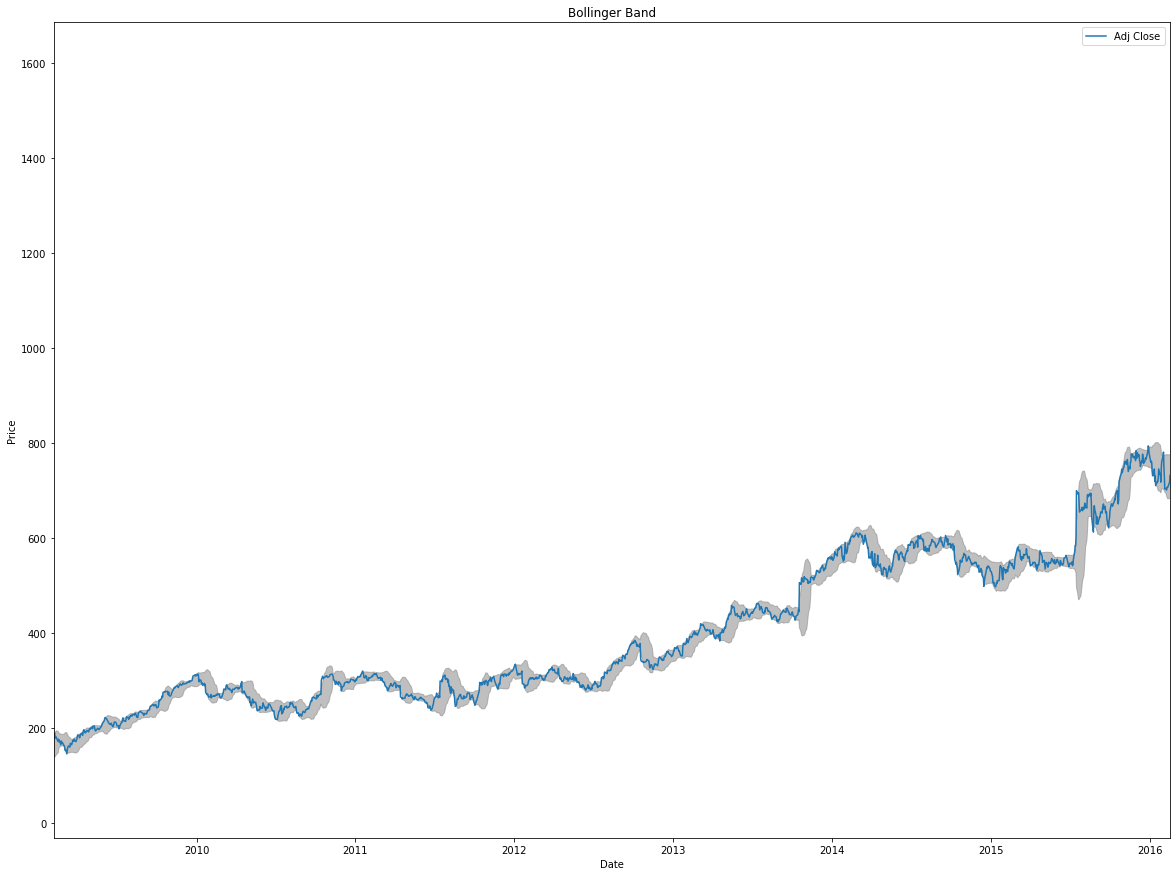

In [22]:
#plotting 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
x_axis = df.index
plt.fill_between(x_axis,df['Bollinger High'],df['Bollinger Low'],color='grey',alpha=.5)
ax.plot(x_axis,df['Adj Close'],label='Adj Close')
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.xaxis.zoom(3)
ax.legend()

In [23]:
#We will be predicting the next day price. We are shifting the data by 1 day
df['Adj Close Shift'] = df['Adj Close'].shift(-5)
df.dropna(inplace=True)

In [24]:
#Checking data before we split it into training and testing 
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3944 entries, 2004-11-30 to 2020-07-30
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                3944 non-null   float64
 1   High                3944 non-null   float64
 2   Low                 3944 non-null   float64
 3   Close               3944 non-null   float64
 4   Adj Close           3944 non-null   float64
 5   Volume              3944 non-null   int64  
 6   RSI                 3944 non-null   float64
 7   Awesome Oscillator  3944 non-null   float64
 8   KAMA                3944 non-null   float64
 9   PPO                 3944 non-null   float64
 10  PVO                 3944 non-null   float64
 11  ROC                 3944 non-null   float64
 12  Stoch RSI In        3944 non-null   float64
 13  Stoch RSI OS        3944 non-null   float64
 14  TSI                 3944 non-null   float64
 15  Ult Osc             3944 non-null   f

,Open,High,Low,Close,Adj Close,Volume,RSI,Awesome Oscillator,KAMA,PPO,...,OBV,ADI,CMF,EoM,FI,MFI,NVI,VPT,VWAP,Adj Close Shift
Date,,,,,,,,,,,,,,,,,,,,,
2004-11-30,90.445442,91.591591,90.215218,91.081078,91.081078,15384600,59.376760,2.080964,89.635121,2.509732,...,269638200,-8.223022e+07,-0.214925,6.246404,7.258985e+06,53.501761,1133.531896,276236.763963,87.441286,85.800804
2004-12-01,91.066063,91.341339,89.864868,90.070068,90.070068,15712400,57.383357,2.741006,89.654882,2.506381,...,253925800,-9.357520e+07,-0.218572,-2.821884,3.952645e+06,54.137943,1133.531896,-95383.845365,87.742019,85.075073
2004-12-02,90.040039,90.845848,89.364365,89.789787,89.789787,12509200,56.813906,2.676177,89.660299,2.448743,...,241416600,-9.890012e+07,-0.190250,-5.897852,2.887111e+06,48.058772,1130.004560,-213335.633221,87.701935,86.801804
2004-12-03,90.065063,90.620621,88.888885,90.290291,90.290291,11726600,57.622635,2.317715,89.739878,2.419973,...,253143200,-9.164724e+07,-0.145906,-5.173876,3.313126e+06,40.601987,1136.303403,26439.860169,87.375746,85.910912
2004-12-06,89.654655,90.440437,88.098099,88.233231,88.233231,12495400,53.212079,1.642466,89.674555,2.184124,...,240647800,-1.027009e+08,-0.102778,-9.100709,-8.321477e+05,34.131469,1136.303403,-219313.295954,87.078007,85.310310


In [25]:
#Spliting the dta into training and testing
#X_train = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume']).loc['2004-09-24':'2015-11-06']
#X_test = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume']).loc['2015-11-07':'2020-08-05']
#y_train = df['Adj Close Shift'].loc['2004-09-24':'2015-11-06']
#y_test = df['Adj Close Shift'].loc['2015-11-07':'2020-08-05']

In [26]:
#importing another stock to check for corr and to predict on
aapl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/AAPL/AAPL.csv',parse_dates=['Date'],index_col='Date')
aapl_data['Adj Close'].corr(df['Adj Close'])

0.9593509578637336

In [27]:
#Spliting the dta into training and testing
X = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume'])
y = df['Adj Close Shift']
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [28]:
X_train_columns= X_train.columns
X_train_columns

Index(['RSI', 'Awesome Oscillator', 'KAMA', 'PPO', 'PVO', 'ROC',
       'Stoch RSI In', 'Stoch RSI OS', 'TSI', 'Ult Osc', 'Williams R', 'MACD',
       'ADX', 'Aroon', 'CCI', 'DPO', 'EMA', 'Ichimoku Base', 'Ichimoku CL',
       'KST', 'MASS', 'PSAR', 'STC', 'TRIX', 'VI', 'WMA', 'Bollinger Avg',
       'Bollinger High', 'Bollinger Low', 'ATR', 'Donchain Mid',
       'Donchain High', 'Donchain Low', 'Keltner Mid', 'Keltner High',
       'Keltner Low', 'Ulcer', 'OBV', 'ADI', 'CMF', 'EoM', 'FI', 'MFI', 'NVI',
       'VPT', 'VWAP'],
      dtype='object')

In [29]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LM Train R-Squared: 0.9922170683970852
LM Test R-Squared: 0.9624112190899805
LM Predict R-Squared: 0.9624112190899805
LM Mean Absolute Error: 29.441683870140583


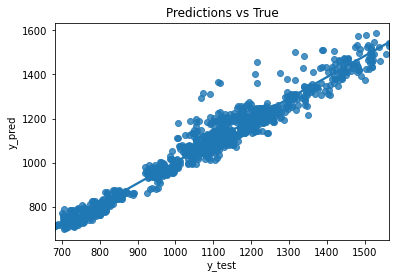

In [30]:
#OLS Linear Model
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error
rModel = linear_model.LinearRegression()
rModel.fit(X_train,y_train)
y_pred = rModel.predict(X_test)
#R-Squared coefficent
train_score = rModel.score(X_train,y_train)
test_score = rModel.score(X_test,y_test)
lm_r2score = r2_score(y_test,y_pred)
print('LM Train R-Squared:',train_score)
print('LM Test R-Squared:',test_score)
print('LM Predict R-Squared:',lm_r2score)
#check to see how prediction repersnt true results
#plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred')
lm_mean_abs_error = mean_absolute_error(y_test,y_pred)
print('LM Mean Absolute Error:',lm_mean_abs_error)

Ridge Train R-Squared: 0.9919292089276376
Ridge Test R-Squared: 0.9655845887566044
Ridge Predict R-Squared: 0.9655845887566044
Ridge Mean Absolute Error: 27.81842423990521


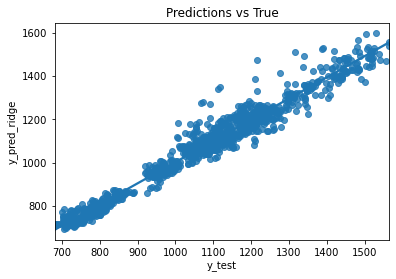

In [31]:
#Ridge Model
ridge_model = linear_model.Ridge()
ridge_model.fit(X_train,y_train)
y_pred_ridge = ridge_model.predict(X_test)
#R-Squared coefficent
ridge_train_score = ridge_model.score(X_train,y_train)
ridge_test_score = ridge_model.score(X_test,y_test)
ridge_pred_score = r2_score(y_test,y_pred_ridge)
print('Ridge Train R-Squared:',ridge_train_score)
print('Ridge Test R-Squared:',ridge_test_score )
print('Ridge Predict R-Squared:',ridge_pred_score)
sns.regplot(x=y_test,y=y_pred_ridge)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred_ridge')
ridge_mean_abs_error = mean_absolute_error(y_test,y_pred_ridge)
print('Ridge Mean Absolute Error:',ridge_mean_abs_error)


In [32]:
X = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume'])
y = df['Adj Close Shift']
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()

alpha_point_1 = []
alpha_1 = []
alpha_10 = [] 

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in [0.1, 1.0, 10.0]:
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        y_pred_ridge = ridge_model.predict(X_ts)
        ridge_train_score = ridge_model.score(X_tr,y_tr)
        ridge_test_score = ridge_model.score(X_ts,y_ts)
        print('Ridge Train R-Squared:',ridge_train_score)
        print('Ridge Test R-Squared:',ridge_test_score )
        ridge_mean_abs_error = mean_absolute_error(y_ts,y_pred_ridge)
        print('Ridge Mean Absolute Error:',ridge_mean_abs_error)
        


Alpha is: 0.1
Ridge Train R-Squared: 0.9810092302157165
Ridge Test R-Squared: 0.9210134820877043
Ridge Mean Absolute Error: 11.454317504281516
Alpha is: 1.0
Ridge Train R-Squared: 0.980992358016166
Ridge Test R-Squared: 0.9234497328574511
Ridge Mean Absolute Error: 11.321875416464048
Alpha is: 10.0
Ridge Train R-Squared: 0.98084829151704
Ridge Test R-Squared: 0.929136685761277
Ridge Mean Absolute Error: 10.982245588582035
Alpha is: 0.1
Ridge Train R-Squared: 0.9740886424582
Ridge Test R-Squared: 0.8574868981057353
Ridge Mean Absolute Error: 8.654110865282467
Alpha is: 1.0
Ridge Train R-Squared: 0.9740877692369212
Ridge Test R-Squared: 0.8574247681416324
Ridge Mean Absolute Error: 8.658081186496789
Alpha is: 10.0
Ridge Train R-Squared: 0.9740644378832674
Ridge Test R-Squared: 0.8573574248252378
Ridge Mean Absolute Error: 8.664640993594363
Alpha is: 0.1
Ridge Train R-Squared: 0.9739525204046215
Ridge Test R-Squared: 0.9492815433495584
Ridge Mean Absolute Error: 14.02457129855224
Alpha is

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.26201e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.0448e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.83635e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.15719e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.44168e-21): result may not be accurate.

In [33]:
#Lasso Model
lasso_model = linear_model.Lasso(tol=.01)
lasso_model.fit(X_train,y_train)
y_pred_lasso = lasso_model.predict(X_test)

lasso_r2score_test = r2_score(y_test,y_pred_lasso)
lasso_r2score_test

0.9673156099920647

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
r2score = r2_score(y_test,y_pred)
mean_abs_error = mean_absolute_error(y_test,y_pred)
print('R^2:',r2score)
print('Mean Absolute Error:',mean_abs_error)

ValueError: Number of features of the model must match the input. Model n_features is 1 and input n_features is 46 

In [35]:
for i in range(10,20,2):
    df['Adj Close Shift'] = df['Adj Close'].shift(i)
    df.dropna(inplace=True)
    X = df.drop(columns=['Adj Close Shift','Adj Close','Open','High','Low','Close','Volume'])
    y = df['Adj Close Shift']
    X_train = X[:int(X.shape[0]*0.7)]
    X_test = X[int(X.shape[0]*0.7):]
    y_train = y[:int(X.shape[0]*0.7)]
    y_test = y[int(X.shape[0]*0.7):]
    model_result = rfr.fit(X_train,y_train)
    y_pred = model_result.predict(X_test)
    r2score = r2_score(y_test,y_pred)
    mean_abs_error = mean_absolute_error(y_test,y_pred)
    print('R^2:',r2score)
    print('Mean Absolute Error:',mean_abs_error)

R^2: -1.9406762296610958
Mean Absolute Error: 298.86507416962763
R^2: -1.9333704811558006
Mean Absolute Error: 296.7901693677744
R^2: -1.897191601196511
Mean Absolute Error: 293.4395180881247
R^2: -1.9054818510482021
Mean Absolute Error: 294.1766243574143
R^2: -1.8652740713748437
Mean Absolute Error: 291.0759625300086


([<matplotlib.axis.YTick at 0x253b7e3d5b0>,
 [Text(0, 0, 'Williams R'),
  Text(0, 0, 'Stoch RSI OS'),
  Text(0, 0, 'Stoch RSI In'),
  Text(0, 0, 'EoM'),
  Text(0, 0, 'VPT'),
  Text(0, 0, 'OBV'),
  Text(0, 0, 'Ult Osc'),
  Text(0, 0, 'Ichimoku CL'),
  Text(0, 0, 'ROC'),
  Text(0, 0, 'FI'),
  Text(0, 0, 'CCI'),
  Text(0, 0, 'ATR'),
  Text(0, 0, 'RSI'),
  Text(0, 0, 'PSAR'),
  Text(0, 0, 'DPO'),
  Text(0, 0, 'PVO'),
  Text(0, 0, 'TRIX'),
  Text(0, 0, 'CMF'),
  Text(0, 0, 'TSI'),
  Text(0, 0, 'MASS'),
  Text(0, 0, 'MFI'),
  Text(0, 0, 'VI'),
  Text(0, 0, 'NVI'),
  Text(0, 0, 'MACD'),
  Text(0, 0, 'Awesome Oscillator'),
  Text(0, 0, 'ADI'),
  Text(0, 0, 'PPO'),
  Text(0, 0, 'VWAP'),
  Text(0, 0, 'KST'),
  Text(0, 0, 'Aroon'),
  Text(0, 0, 'ADX'),
  Text(0, 0, 'STC'),
  Text(0, 0, 'Ulcer'),
  Text(0, 0, 'WMA'),
  Text(0, 0, 'Bollinger High'),
  Text(0, 0, 'Bollinger Avg'),
  Text(0, 0, 'Keltner Mid'),
  Text(0, 0, 'EMA'),
  Text(0, 0, 'Keltner Low'),
  Text(0, 0, 'Donchain High'),
  Text(0, 

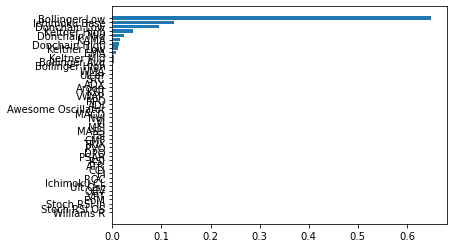

In [36]:
feature_importance = rfr.feature_importances_

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

plt.barh(pos,feature_importance[sorted_idx])
plt.yticks(pos,X_train_columns[sorted_idx])

In [37]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()


for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rfr = RandomForestRegressor(n_estimators=100)
    model_result = rfr.fit(X_train,y_train)
    y_pred = model_result.predict(X_test)
    r2score = r2_score(y_test,y_pred)
    mean_abs_error = mean_absolute_error(y_test,y_pred)
    print('R^2:',r2score)
    print('Mean Absolute Error:',mean_abs_error)




R^2: -1.8505621579947342
Mean Absolute Error: 290.2509073370077
R^2: -1.8170891044688235
Mean Absolute Error: 287.6484113186671
R^2: -1.8460329864587242
Mean Absolute Error: 290.0461736908599
R^2: -1.828398799299582
Mean Absolute Error: 288.92307673246785
R^2: -1.8431749950762515
Mean Absolute Error: 289.2140195289254
